# Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Description

The columns/variables in this dataset are:  
> **PassengerId** = An index number for each passenger  
**Survived** = Whether or not the passenger survived  
**Pclass** = The passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)  
**Name** = The name of the passenger  
**Sex** = The gender of the passenger  
**Age** = The age of the passenger  
**SibSp** = The number of siblings/spouses the passenger has  
**Parch** = The number of parents/children the passenger has  
**Ticket** = The ticket number  
**Fare** = The cost of the ticket  
**Cabin** = The passengers cabin number  
**Embarked** = The port the passenger embarked from (C = Cherbourg, Q = Queenstown, S = Southhampton)  

In [2]:
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Taking a quick look at the training and test data sets, looks like all the columns are the same except for the Survived column which we will be making predictions for on the test data. We can disregard the test data for now and work on cleaning up the training data.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looks like there are some null values that need to be taken care of for the Age, Cabin, and Embarked columns. We'll start by looking at the Age column.

In [7]:
print(f'Mean Age: {train_df.Age.mean()}')
print(f'Median Age: {train_df.Age.median()}')

Mean Age: 29.69911764705882
Median Age: 28.0


We could fill the null values with either the average age or the median age of all passengers, both values being very similar. However, we can better predict age by grouping similar passengers together. We'll group passengers by Pclass and Sex, assuming that the people in each Pclass are more similar to each other than the people in other Pclasses.

In [8]:
s_class = train_df.groupby(['Pclass', 'Sex'])

In [9]:
s_class.median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female        447.0       1.0  35.0    0.0    0.0  82.66455
       male          480.5       0.0  40.0    0.0    0.0  41.26250
2      female        439.5       1.0  28.0    0.0    0.0  22.00000
       male          416.5       0.0  30.0    0.0    0.0  13.00000
3      female        376.0       0.5  21.5    0.0    0.0  12.47500
       male          466.0       0.0  25.0    0.0    0.0   7.92500

In [10]:
s_class.mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

Just as we thought, grouping the similar passengers together gives us a much better picture of the age differences between Pclass/Sex and will allow us to make more accurate values for the null age values. Let's go ahead and fill the null age values with the median age of each group.

Grouping passengers this way also shows the discrepancy in fare price between Pclass/Sex.

In [11]:
train_df.loc[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [12]:
## create a function to impute median of grouped object

def impute_median(series):
    return series.fillna(series.median())

In [13]:
## replace null values with median values of each group

train_df['Age'] = s_class['Age'].transform(impute_median)

In [14]:
train_df['Age'].isnull().sum()

0

In [15]:
train_df['Cabin'].isnull().sum() / len(train_df)

0.7710437710437711

Because there are so many null values for the cabin column (77% of the cabin column is a null value), we'll remove it from the data.

In [16]:
train_df.drop('Cabin', axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train_df.loc[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

There are only 2 null values for the Embarked column and 3 unique values for the column. We'll try to find the most similar passengers to the rows with null values and use the embarked values that we find.

In [19]:
## creating a new df so it's easier to navigate through the values

em_null = train_df.loc[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'female') & (train_df['Survived'] == 1) & 
                       (train_df['SibSp'] == 0) & (train_df['Parch'] == 0)]
em_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,C


In [20]:
## checking values for embarked for similar passengers

em_null['Embarked'].value_counts()

C    17
S    14
Name: Embarked, dtype: int64

In [21]:
## checking if filtering by age will affect the values

em_null.loc[em_null['Age'] < 45]['Embarked'].value_counts()

C    16
S    11
Name: Embarked, dtype: int64

In [22]:
em_null.loc[em_null['Age'] > 45]['Embarked'].value_counts()

S    3
C    1
Name: Embarked, dtype: int64

While the values in the Embarked columns are very similar when looking at similar passengers, it looks like there are more 'C' values for younger people and more 'S' values for older people. The difference isn't too skewed to be certain of these values but we'll go ahead and use 'C' for the younger passenger and 'S' for the older one.

In [23]:
## replacing null values

train_df.iloc[[61], [-1]] = 'C'
train_df.iloc[[829], [-1]] = 'S'

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


Taking a look at correlation values, it looks like passenger id has almost 0 correlation with whether or not a person will survive, and has very low correlation with all other columns. And after taking a look at the data, it seems like the passenger id is just a random number assigned to each passenger so we'll remove the column.

In [26]:
train_df.drop('PassengerId', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Taking a look at fare, it looks like there are a couple amounts with 0. Let's take a look and see if they're null values.

In [31]:
train_df.loc[train_df['Fare'] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,S
466,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,40.0,0,0,112052,0.0,S


It looks like all the passengers with a fare of 0 are male, do not have any family on board, and all departed from the same port. Since they are all in different classes, we will replace the fare with the median fare cost for each class/gender.

In [32]:
train_df.groupby(['Pclass', 'Sex'])['Fare'].median()

Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64

In [33]:
## changing the 0's to null values so that we can use the same method we used to change null values for Age
## we can use the s_class dataframe we created earlier which grouped by pclass and sex

train_df['Fare'].replace(0, np.NaN, inplace=True)
train_df['Fare'] = s_class['Fare'].transform(impute_median)

In [34]:
## checking to see if the data was inputted correctly

train_df.iloc[[179, 263, 277]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,7.9250,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,49.5042,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,13.0000,S


Now that we've taken care of our data lets move on to some visualizations

## EDA and Visualizations

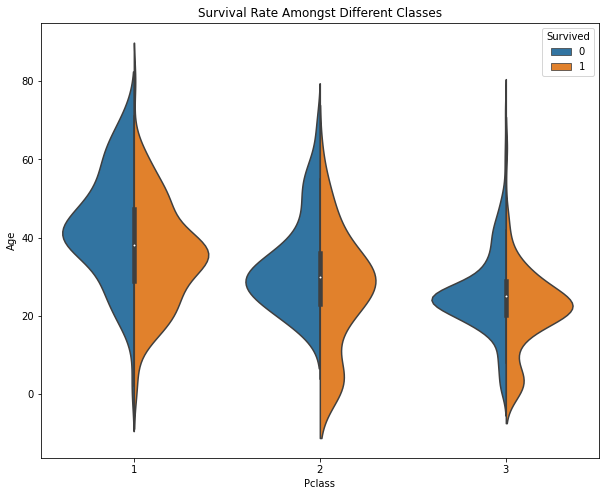

In [35]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df, split=True)
plt.title('Survival Rate Amongst Different Classes')
plt.show()

In [58]:
## find the percentage of passengers that survived in each pclass

train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Taking a look at this data there are sharp peaks around 20-35 for pclass 2 and 3, falling off quickly thereafter. However for pclass 1, there is not a sharp peak and most of the passengers survive until you get around age 45 when there are more deaths than survivors. It seems like there are younger passengers in pclass 2 and 3 when compared to pclass 1.

In [36]:
print('Pclass 1 Under 45 Survival Rate: ', len(train_df.loc[(train_df['Pclass'] == 1) & (train_df['Age'] <= 45) & (train_df['Survived'] == 1)])/len(train_df.loc[(train_df['Pclass'] == 1) & (train_df['Age'] <= 45)])*100,'%')
print('Pclass 2 Under 45 Survival Rate: ', len(train_df.loc[(train_df['Pclass'] == 2) & (train_df['Age'] <= 45) & (train_df['Survived'] == 1)])/len(train_df.loc[(train_df['Pclass'] == 2) & (train_df['Age'] <= 45)])*100,'%')
print('Pclass 3 Under 45 Survival Rate: ', len(train_df.loc[(train_df['Pclass'] == 3) & (train_df['Age'] <= 45) & (train_df['Survived'] == 1)])/len(train_df.loc[(train_df['Pclass'] == 3) & (train_df['Age'] <= 45)])*100,'%')
print('')
print('Pclass 1 Over 45 Survival Rate: ', len(train_df.loc[(train_df['Pclass'] == 1) & (train_df['Age'] > 45) & (train_df['Survived'] == 1)])/len(train_df.loc[(train_df['Pclass'] == 1) & (train_df['Age'] > 45)])*100,'%')
print('Pclass 2 Over 45 Survival Rate: ', len(train_df.loc[(train_df['Pclass'] == 2) & (train_df['Age'] > 45) & (train_df['Survived'] == 1)])/len(train_df.loc[(train_df['Pclass'] == 2) & (train_df['Age'] > 45)])*100,'%')
print('Pclass 3 Over 45 Survival Rate: ', len(train_df.loc[(train_df['Pclass'] == 3) & (train_df['Age'] > 45) & (train_df['Survived'] == 1)])/len(train_df.loc[(train_df['Pclass'] == 3) & (train_df['Age'] > 45)])*100,'%')

Pclass 1 Under 45 Survival Rate:  68.83116883116884 %
Pclass 2 Under 45 Survival Rate:  49.68944099378882 %
Pclass 3 Under 45 Survival Rate:  24.947145877378436 %

Pclass 1 Over 45 Survival Rate:  48.38709677419355 %
Pclass 2 Over 45 Survival Rate:  30.434782608695656 %
Pclass 3 Over 45 Survival Rate:  5.555555555555555 %


Looking at the survival rates of ages over/under 45 for all 3 classes, it is very clear that passengers in pclass 1 had a much higher chance of survival than the other pclasses. The survival rate for younger passengers is much higher for all 3 classes, with passengers under 45 having about a 20% higher chance of survival than passengers over 45. We can speculate the reasons as to why there might be such a gap in survival range between the two age groups, perhaps the younger, able bodied passengers were able to make it to the life boats more quickly or survive the frigid temperatures. The older passengers may have also given up their spots to the younger passengers out of altruism.

Lets take a look to see if there are any differences in survival rate amongst genders in the pclasses.

In [39]:
## create a new column that groups pclass and sex

train_df['PclassSex'] = train_df['Pclass'].astype(str) + train_df['Sex']
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PclassSex
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1female
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1female
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,3male


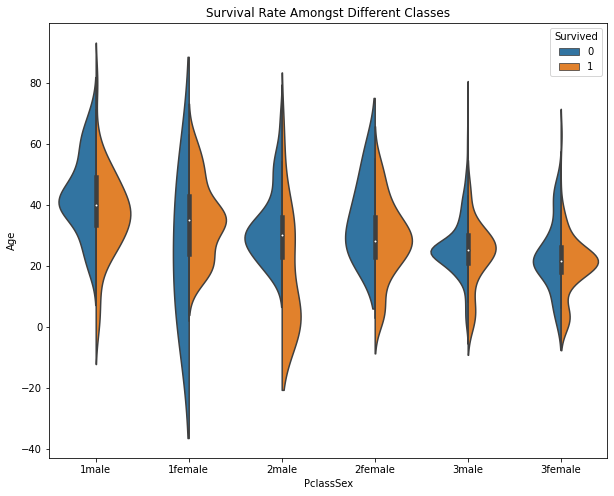

In [53]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='PclassSex', y='Age', hue='Survived', data=train_df, split=True, order=['1male', '1female', '2male', '2female', '3male', '3female'])
plt.title('Survival Rate Amongst Different Classes')
plt.show()

In [42]:
print('Pclass 1 Male Survival Rate: ', len(train_df.loc[(train_df['PclassSex'] == '1male') & (train_df['Survived'] == 1)])/len(train_df.loc[train_df['PclassSex'] == '1male'])*100,'%')
print('Pclass 2 Male Survival Rate: ', len(train_df.loc[(train_df['PclassSex'] == '2male') & (train_df['Survived'] == 1)])/len(train_df.loc[train_df['PclassSex'] == '2male'])*100,'%')
print('Pclass 3 Male Survival Rate: ', len(train_df.loc[(train_df['PclassSex'] == '3male') & (train_df['Survived'] == 1)])/len(train_df.loc[train_df['PclassSex'] == '3male'])*100,'%')
print('')
print('Pclass 1 Female Survival Rate: ', len(train_df.loc[(train_df['PclassSex'] == '1female') & (train_df['Survived'] == 1)])/len(train_df.loc[train_df['PclassSex'] == '1female'])*100,'%')
print('Pclass 2 Female Survival Rate: ', len(train_df.loc[(train_df['PclassSex'] == '2female') & (train_df['Survived'] == 1)])/len(train_df.loc[train_df['PclassSex'] == '2female'])*100,'%')
print('Pclass 3 Female Survival Rate: ', len(train_df.loc[(train_df['PclassSex'] == '3female') & (train_df['Survived'] == 1)])/len(train_df.loc[train_df['PclassSex'] == '3female'])*100,'%')

Pclass 1 Male Survival Rate:  36.885245901639344 %
Pclass 2 Male Survival Rate:  15.74074074074074 %
Pclass 3 Male Survival Rate:  13.544668587896252 %

Pclass 1 Female Survival Rate:  96.80851063829788 %
Pclass 2 Female Survival Rate:  92.10526315789474 %
Pclass 3 Female Survival Rate:  50.0 %


After splitting up the glasses into genders we can see that there is a huge discrepancy in survival rates between genders. The survival rate of males in class 1 is a little more than double the survival rate of males in classes 2-3 at 37%. Females in classes 1 and 2 had a 90+% chance of survival while females in class 3 had a 50% chance of survival. It's clear by looking at this data that most of the survivors were female and we should make sure to take this into account when making our models.

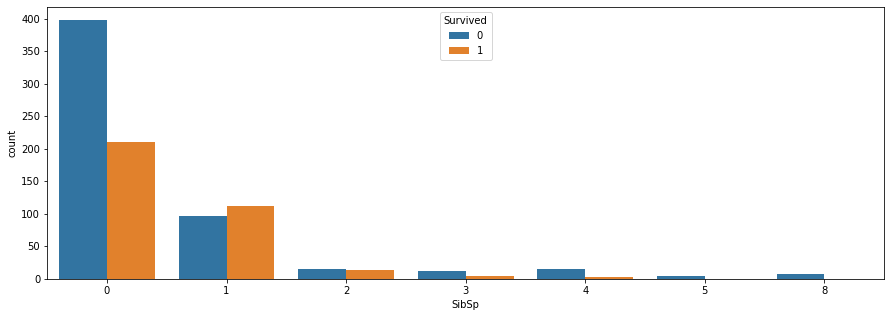

In [69]:
plt.figure(figsize=(15, 5))
sns.countplot(x='SibSp', hue='Survived', data=train_df, )

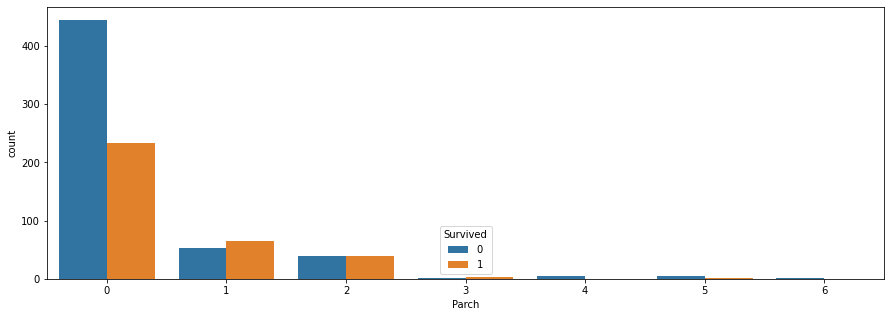

In [70]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Parch', hue='Survived', data=train_df, )